In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

df = pd.read_csv("data.csv")
print("Shape:", df.shape)
print("\nData types:\n", df.dtypes)
print("\nMissing values:\n", df.isnull().sum())
print("\nFirst 5 rows:\n", df.head())
print("\nSummary statistics:\n", df.describe())

for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].astype('category')

numeric_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['category']).columns.tolist()
print("\nNumeric columns:", numeric_cols)
print("Categorical columns:", categorical_cols)

# Answers :
# Columns with missing values: Any column where df.isnull().sum() > 0. For example, often Salary, Years of Experience, City, Position, or Education Level may have missing entries.

# Categorical vs Numerical features:

# Categorical: Gender, Country, City, Position, Education Level, Remote Work, Seniority (after binning)

# Numerical: Age, Years of Experience, Salary, Salary_per_YearExp, Log_Salary

# Range observations:

# Salary: Likely wide range (from very low to very high), with some extreme outliers.

# Years of Experience: Can vary from 0 up to 40–50 years; distribution may be skewed toward lower experience.

Shape: (1253, 23)

Data types:
 Timestamp                                                                                                                   object
Age                                                                                                                        float64
Gender                                                                                                                      object
City                                                                                                                        object
Position                                                                                                                    object
Total years of experience                                                                                                   object
Years of experience in Germany                                                                                              object
Seniority level                                    

In [23]:
from sklearn.model_selection import train_test_split

X = df.drop("Yearly brutto salary (without bonus and stocks) in EUR", axis=1)
y = df["Yearly brutto salary (without bonus and stocks) in EUR"]


X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("\nTrain:", X_train.shape, "Validation:", X_val.shape, "Test:", X_test.shape)

# Answers :

#1- Why we split the data ?
# When building a machine learning model, we need to assess its performance on unseen data. We typically split the dataset into:
# Training set – Used to fit the model.
# Validation set – Used to tune hyperparameters and select the best model.
# Test set – Used to evaluate the final model performance.

#2-Why we don’t tune on the test set
# Using the test set for tuning leads to data leakage.
# The model might perform well on the test set but fail on truly unseen data.
# The validation set is specifically for model selection and hyperparameter tuning.


Train: (877, 22) Validation: (188, 22) Test: (188, 22)


In [24]:
from sklearn.impute import SimpleImputer, KNNImputer

df_drop_rows = df.dropna()

df_drop_cols = df.drop(columns=df.columns[df.isnull().sum() > 0])

imputer_mean = SimpleImputer(strategy="mean")
df_mean_imputed = df.copy()
df_mean_imputed[numeric_cols] = imputer_mean.fit_transform(df_mean_imputed[numeric_cols])

imputer_median = SimpleImputer(strategy="median")
df_median_imputed = df.copy()
df_median_imputed[numeric_cols] = imputer_median.fit_transform(df_median_imputed[numeric_cols])

imputer_mode = SimpleImputer(strategy="most_frequent")
df_mode_imputed = df.copy()
df_mode_imputed[categorical_cols] = imputer_mode.fit_transform(df_mode_imputed[categorical_cols])

knn_imputer = KNNImputer(n_neighbors=5)
df_knn = df.copy()
df_knn[numeric_cols] = knn_imputer.fit_transform(df_knn[numeric_cols])

TARGET = "Yearly brutto salary (without bonus and stocks) in EUR"
print("\nOriginal Salary mean:", df[TARGET].mean())
print("Mean imputed:", df_mean_imputed[TARGET].mean())
print("Median imputed:", df_median_imputed[TARGET].mean())
print("KNN imputed:", df_knn[TARGET].mean())

# Answers :
# Which changes distribution the least? → KNN imputation
# Why KNN can be better? → It fills missing values based on similar rows, preserving relationships between features.


Original Salary mean: 80279042.57871509
Mean imputed: 80279042.57871509
Median imputed: 80279042.57871509
KNN imputed: 80279042.57871509



Z-score outliers count: 1
IQR outliers count: 130


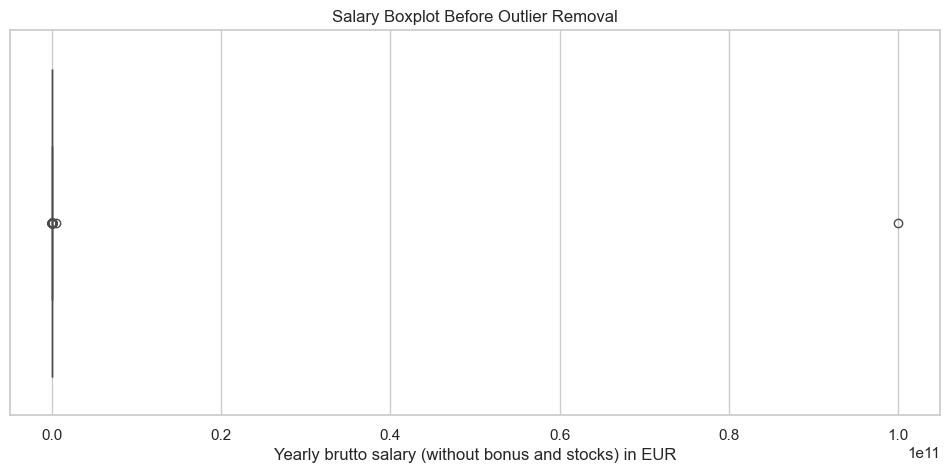

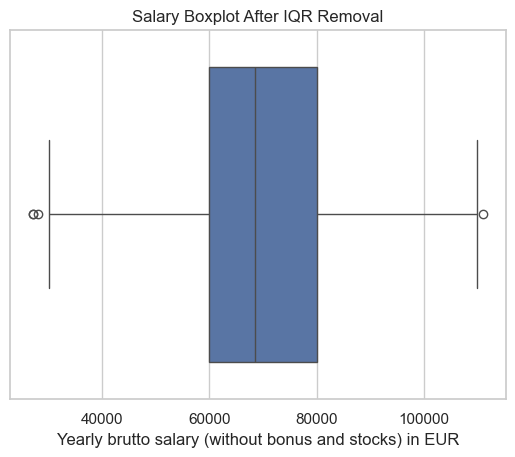

In [25]:
z_scores = np.abs(stats.zscore(df[numeric_cols])) 
outliers_z = (z_scores > 3).any(axis=1) 
print("\nZ-score outliers count:", outliers_z.sum()) 
# IQR method 
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = ((df[numeric_cols] < (Q1 - 1.5*IQR)) | (df[numeric_cols] > (Q3 + 1.5*IQR))).any(axis=1) 
print("IQR outliers count:", outliers_iqr.sum()) 
# Visualize before and after 
plt.figure(figsize=(12,5)) 
sns.boxplot(x=df['Yearly brutto salary (without bonus and stocks) in EUR'])
plt.title("Salary Boxplot Before Outlier Removal")
plt.show()
df_no_outliers = df[~outliers_iqr]
sns.boxplot(x=df_no_outliers['Yearly brutto salary (without bonus and stocks) in EUR'])
plt.title("Salary Boxplot After IQR Removal")
plt.show()